<a href="https://colab.research.google.com/github/SirilukLee/MachineLearning-KMITL/blob/main/My_decision_tree_exercise_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library ที่ใช้**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

# How to draw decision tree

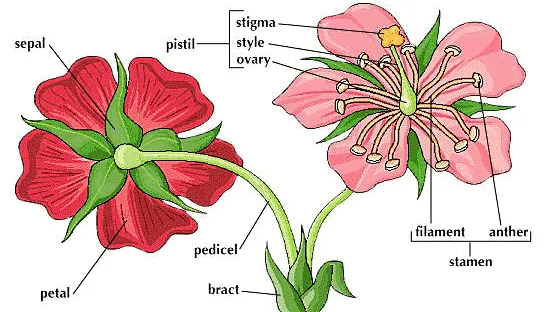

In [2]:
# Read data
iris = datasets.load_iris()
X = iris.data
y = iris.target
y[:5]

array([0, 0, 0, 0, 0])

In [3]:
print('Feature names:')
print(iris.feature_names)

print('\nTarget names:')
print(iris.target_names)

Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target names:
['setosa' 'versicolor' 'virginica']


In [4]:
# Create classification model with decission tree
clf = DecisionTreeClassifier(random_state=10)
model = clf.fit(X, y)

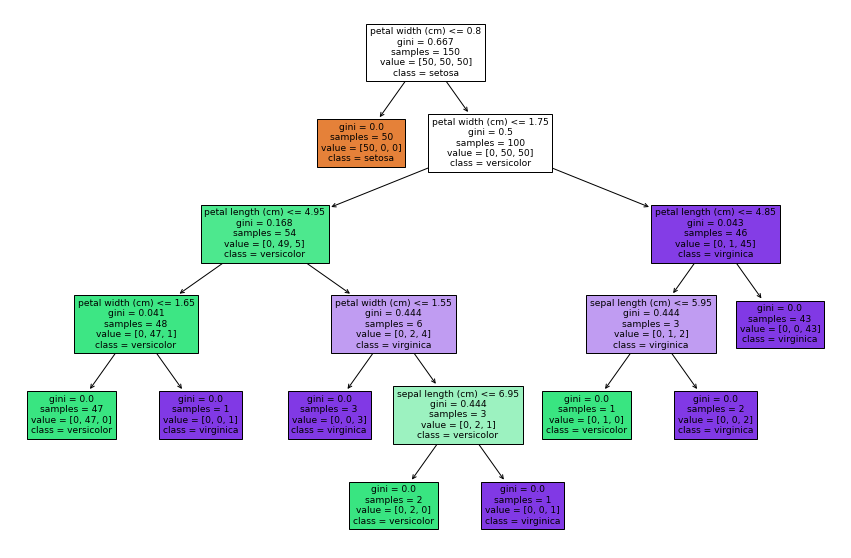

In [5]:
# Plot decission tree
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

# Practice

## Heart Attack Dataset

**About this dataset**
- Age : Age of the patient
- Sex : Sex of the patient
- cp : Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- rest_ecg : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- exng: exercise induced angina (1 = yes; 0 = no)
- oldpeak : Previous peak
- slp : 
- caa: number of major vessels (0-3)
- thall : 
- output :
    - 0 = less chance of heart attack
    - 1 = more chance of heart attack

**นำเข้าข้อมูลไฟล์  heart.csv**

In [7]:
df = pd.read_csv('heart.csv')

**ใช้ head() descibe() info() เพื่อดูข้อมูลเบื้องต้น**

In [ ]:
df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [8]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [9]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


พล็อตกราฟเพื่อดูความสัมพันธ์ของข้อมูลที่เป็น categorical

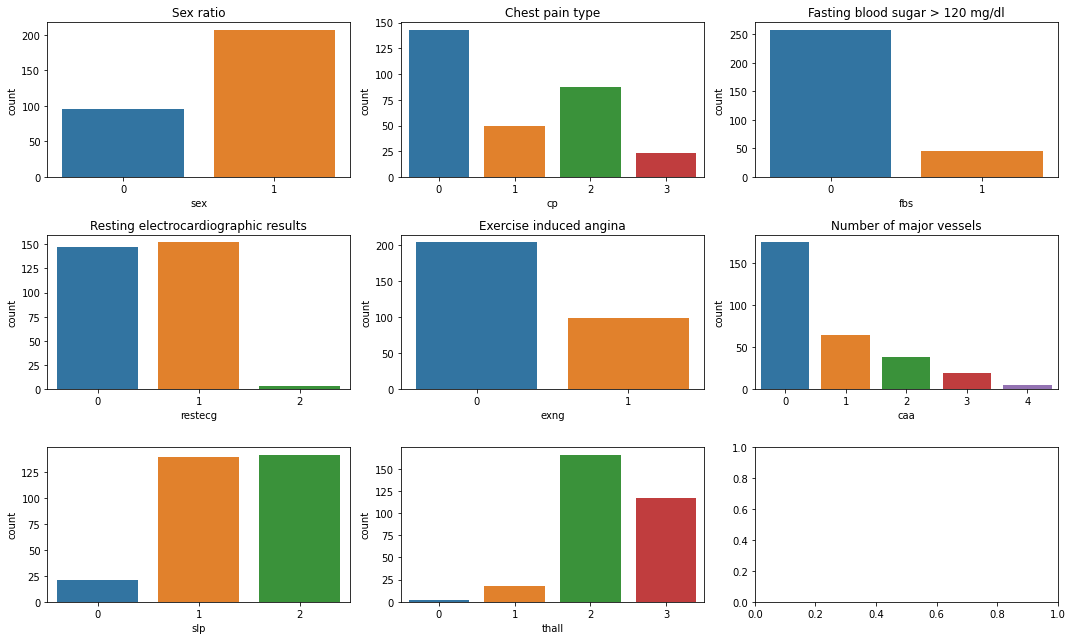

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,9))

sns.countplot(data=df, x='sex', ax=axes[0,0])
axes[0,0].set_title('Sex ratio')

sns.countplot(data=df, x='cp', ax=axes[0,1])
axes[0,1].set_title('Chest pain type')

sns.countplot(data=df, x='fbs', ax=axes[0,2])
axes[0,2].set_title('Fasting blood sugar > 120 mg/dl')

sns.countplot(data=df, x='restecg', ax=axes[1,0])
axes[1,0].set_title('Resting electrocardiographic results')

sns.countplot(data=df, x='exng', ax=axes[1,1])
axes[1,1].set_title('Exercise induced angina')

sns.countplot(data=df, x='caa', ax=axes[1,2])
axes[1,2].set_title('Number of major vessels')

sns.countplot(data=df, x='slp', ax=axes[2,0])

sns.countplot(data=df, x='thall', ax=axes[2,1])

plt.tight_layout()

พล็อตกราฟเพื่อดูความสัมพันธ์ของข้อมูลที่เป็น continuous

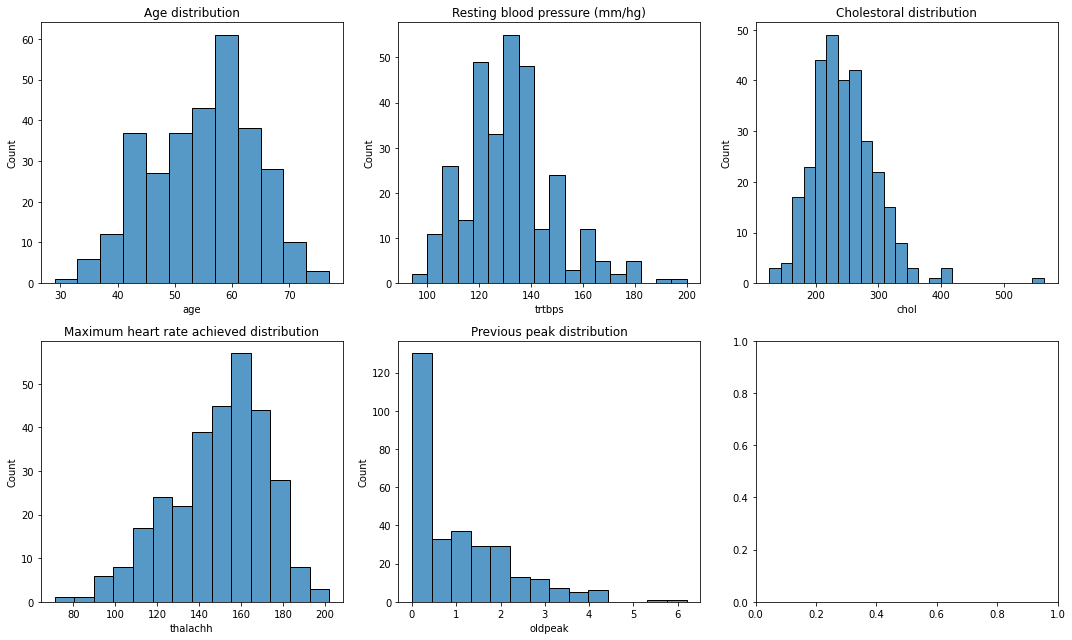

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,9))

sns.histplot(data=df, x='age', ax=axes[0,0])
axes[0,0].set_title('Age distribution')

sns.histplot(data=df, x='trtbps', ax=axes[0,1])
axes[0,1].set_title('Resting blood pressure (mm/hg)')

sns.histplot(data=df, x='chol', ax=axes[0,2])
axes[0,2].set_title('Cholestoral distribution')

sns.histplot(data=df, x='thalachh', ax=axes[1,0])
axes[1,0].set_title('Maximum heart rate achieved distribution')

sns.histplot(data=df, x='oldpeak', ax=axes[1,1])
axes[1,1].set_title('Previous peak distribution')

plt.tight_layout()

**กำหนดตัวแปรต้น (X) และตัวแปรตาม (y)**

In [13]:
x = df.drop(['output'], axis=1)
y = df['output']

**แบ่งข้อมูลเป็น 2 ชุดคือ Training Data กับ Testing Data โดยใช้คำสั่ง `train_test_split` โดยให้ `test_size=0.3` และ `random_state=101`**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101 )

**fit model โดยการกำหนด `max_depth = 5`**

In [28]:
clf = DecisionTreeClassifier(max_depth=5, random_state=101, criterion='entropy')
model = clf.fit(X_train, y_train)


**คำนวณ accuracy ของ model**

In [29]:
print(f'Train data accuracy score\t: {np.round(model.score(X_train, y_train), 2)*100}%')
print(f'Test data accuracy score\t: {np.round(model.score(X_test, y_test), 2)*100}%')

Train data accuracy score	: 93.0%
Test data accuracy score	: 77.0%


In [ ]:
#decision tree มักมีปัญหา over fit ทำนายได้ดีกับ train set แต่ทำนาย test set ได้ไม่ดี

**plot confusion matrix**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


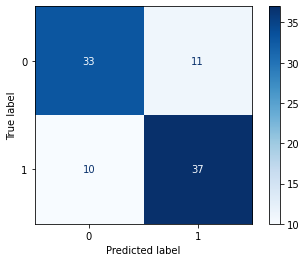

In [30]:
plot_confusion_matrix(model, X_test, y_test, cmap='Blues', values_format='d')

**plot roc curve**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


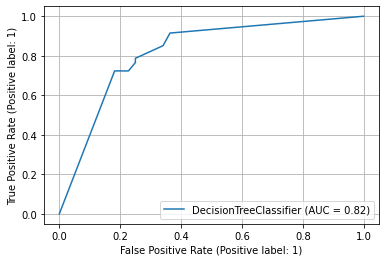

In [31]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X_test, y_test)
plt.grid()

**วาด Decision tree**

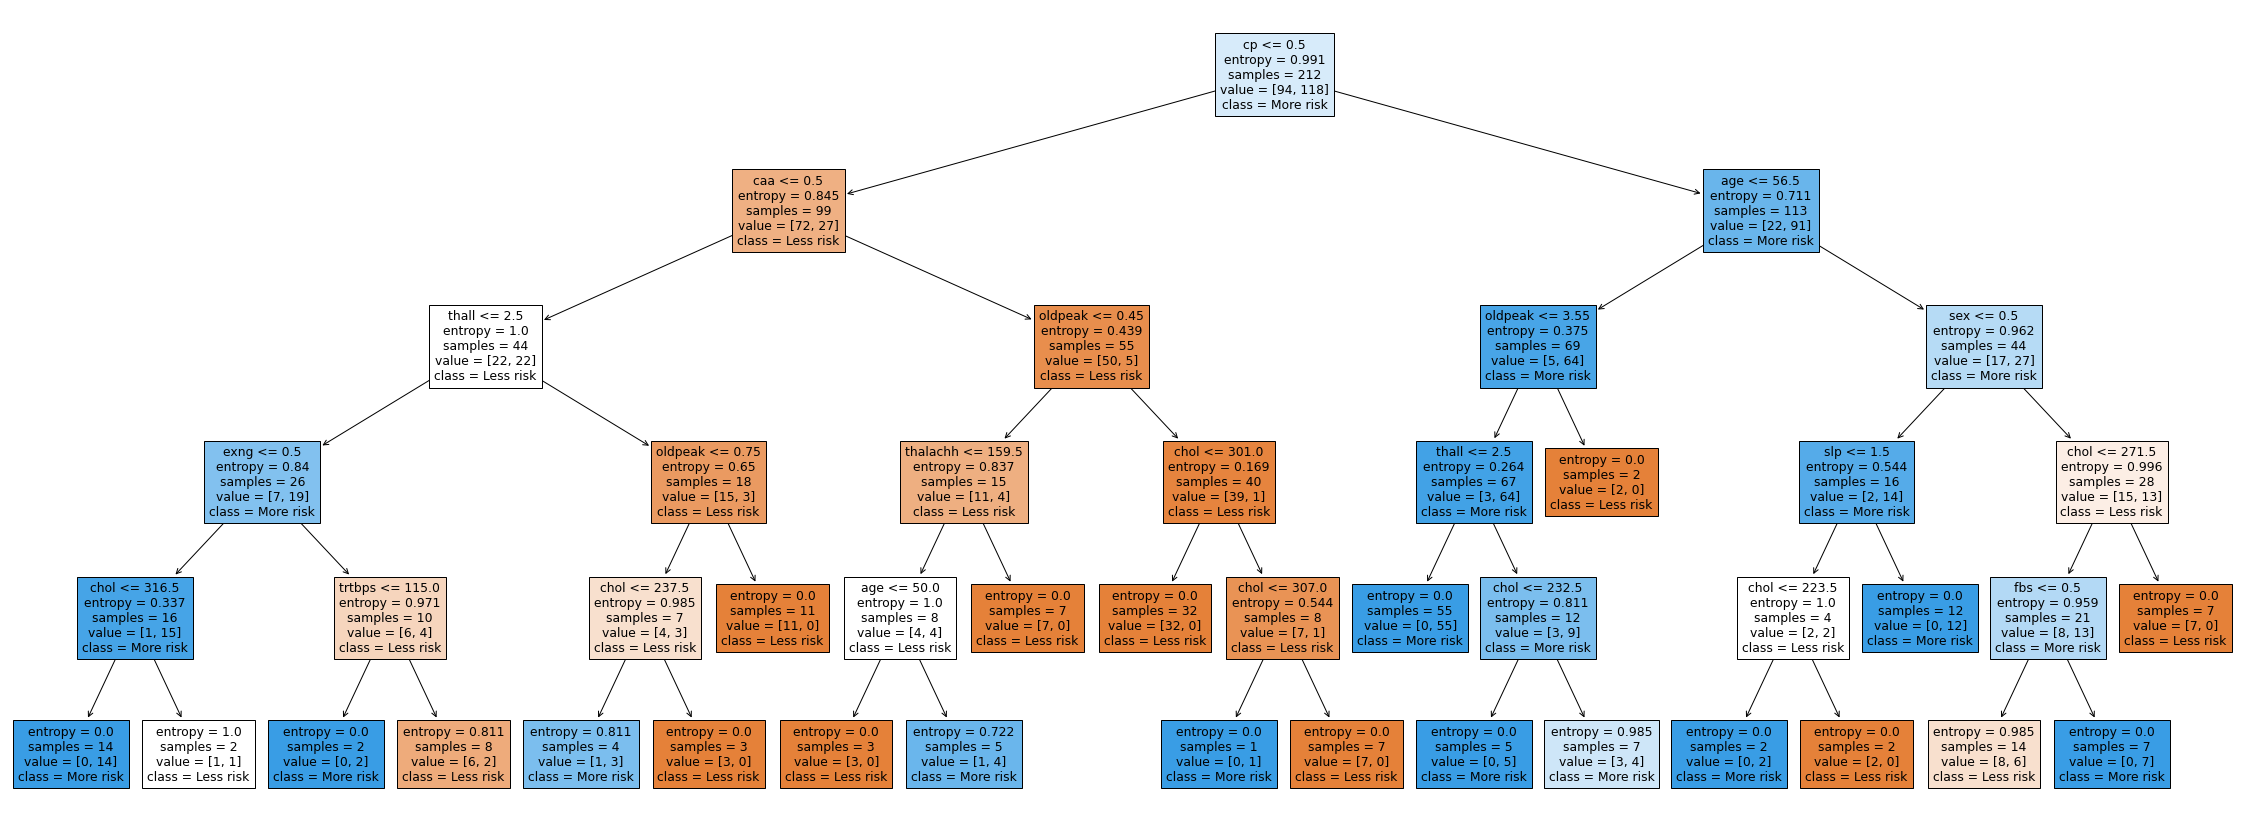

In [34]:
# Plot decission tree (ดูจากตัวอย่างด้านบน)
fig = plt.figure(figsize=(40,15))
_ = tree.plot_tree(clf,
                   feature_names=x.columns,
                   class_names=['Less risk', 'More risk'],
                   filled=True)

### Nominal and Ordinal Variables
- **Nominal Variable (Categorical).** Variable comprises a finite set of discrete values with no relationship between values.
- **Ordinal Variable.** Variable comprises a finite set of discrete values with a ranked ordering between values.



**ทำ one hot encoding กับข้อมูลที่เป็นหมวดหมู่ประเภท norminal**

In [35]:
norminal_col = ['sex', 'slp', 'thall']
numerical_col = ['chol', 'output', 'thalachh', 'restecg', 'trtbps', 'oldpeak', 'age', 'cp', 'fbs', 'exng', 'caa']

In [36]:
# สร้าง df สำหรับเฉพาะ column ที่เป็นตัวเลข
numerical_df = df.loc[:, numerical_col].copy()
numerical_df

,chol,output,thalachh,restecg,trtbps,oldpeak,age,cp,fbs,exng,caa
0,233,1,150,0,145,2.3,63,3,1,0,0
1,250,1,187,1,130,3.5,37,2,0,0,0
2,204,1,172,0,130,1.4,41,1,0,0,0
3,236,1,178,1,120,0.8,56,1,0,0,0
4,354,1,163,1,120,0.6,57,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
298,241,0,123,1,140,0.2,57,0,0,1,0
299,264,0,132,1,110,1.2,45,3,0,0,0
300,193,0,141,1,144,3.4,68,0,1,0,2
301,131,0,115,1,130,1.2,57,0,0,1,1


In [37]:
# สร้าง df สำหรับเฉพาะ column ที่เป็นหมวดหมู่
category_df = df.loc[:, norminal_col].copy()
category_df

,sex,slp,thall
0,1,0,1
1,1,0,2
2,0,2,2
3,1,2,2
4,0,2,2
...,...,...,...
298,0,1,3
299,1,1,3
300,1,1,3
301,1,1,3


In [38]:
category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sex     303 non-null    int64
 1   slp     303 non-null    int64
 2   thall   303 non-null    int64
dtypes: int64(3)
memory usage: 7.2 KB


**ทำการแปลงทุก column ใน category_df เป็น one-hot encoding**

In [39]:
# แปลง Datatypeให้เป็น str ก่อน
category_df = category_df.astype('str')
# ใช้ pd.get_dummies()
onehot_column = pd.get_dummies(category_df)
# ใช้ concat() เพื่อ merge Dataframe ที่ทำ column one-hot ขึ้นมากับ numerical_df
df = pd.concat([numerical_df, category_df], axis=1)
df

,chol,output,thalachh,restecg,trtbps,oldpeak,age,cp,fbs,exng,caa,sex,slp,thall
0,233,1,150,0,145,2.3,63,3,1,0,0,1,0,1
1,250,1,187,1,130,3.5,37,2,0,0,0,1,0,2
2,204,1,172,0,130,1.4,41,1,0,0,0,0,2,2
3,236,1,178,1,120,0.8,56,1,0,0,0,1,2,2
4,354,1,163,1,120,0.6,57,0,0,1,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,241,0,123,1,140,0.2,57,0,0,1,0,0,1,3
299,264,0,132,1,110,1.2,45,3,0,0,0,1,1,3
300,193,0,141,1,144,3.4,68,0,1,0,2,1,1,3
301,131,0,115,1,130,1.2,57,0,0,1,1,1,1,3


** Fit model Desicions Tree และ คำนวณค่า Accuracy

In [40]:
# Fit the model here!
X = df.drop(['output'],axis=1)
y = df['output']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

clf = DecisionTreeClassifier(max_depth=3, random_state=101)
model = clf.fit(X_train,y_train)

# Make prediction
y_pred = model.predict(X_test)

# Accuracy score.
accuracy_score(y_test, y_pred)

0.8131868131868132

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


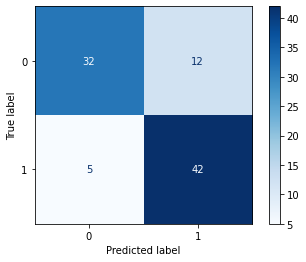

In [41]:
plot_confusion_matrix(model, X_test, y_test, cmap='Blues', values_format='d')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


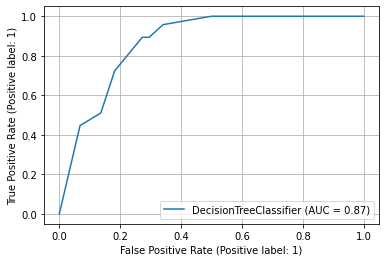

In [42]:
plot_roc_curve(model, X_test, y_test)
plt.grid()

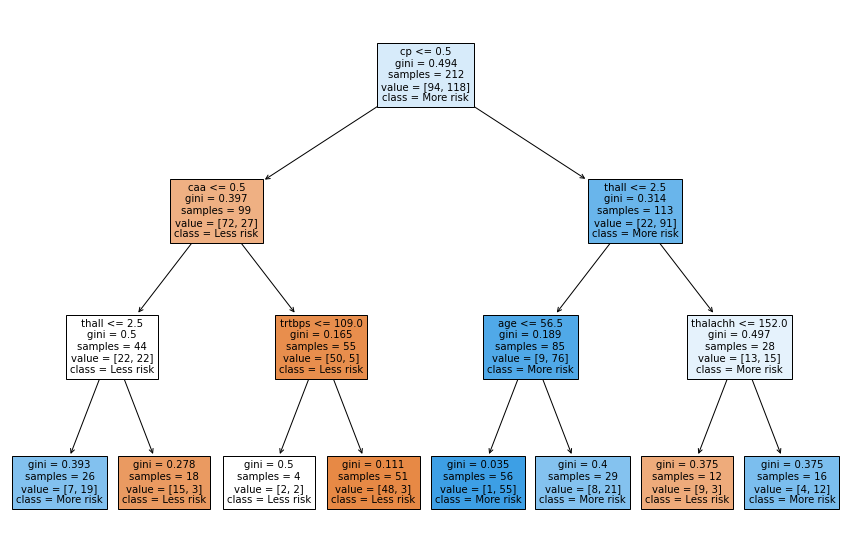

In [43]:
# Plot decission tree
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(model, 
                   feature_names=X.columns,
                   class_names=['Less risk', 'More risk'],
                   filled=True)